In [17]:
#ST1D: obtenção da função de transferência
#modelo com massa rigida mp acoplado a plataforma

from sympy import symbols
ksv, tsv, s = symbols('ksv tsv s')
expr1 = ksv/(1+tsv*s)
#expr1

kq, kc, xsv, pl = symbols('kq kc xsv pl')
expr2=kq*xsv-kc*pl
#expr2

cl, A, kh = symbols('cl A kh')
expr3=1/(cl+A*A/kh*s)
#expr3

expr4=A

expr5=A*s

msp, csp, ksp=symbols('msp csp ksp')
Hsp=-msp*s*s/(msp*s*s+csp*s+ksp)
#Hsp

#mp=symbols('mp')
#mt=mp+msp*(1+Hsp)
#mt

mt, ctm=symbols('mt ctm')
expr6=1/(mt*s*s+ctm*s)
#expr6


expr7=msp*s*s

isv=symbols('isv')
Ql=expr2.subs(xsv,expr1*isv)
#Ql

from sympy import *
xp, isv=symbols('xp isv')
expr_pl_1=pl-(Ql-expr5*xp)*expr3
expr_pl_2=solveset(expr_pl_1,pl)
expr_pl=expr_pl_2.args[0]            #para converter FiniteSet em sym, i.e. tirar os parenteses {}

#expr_pl
#expand(expr_pl)
#factor(expr_pl)

expr_fs=A*expr_pl
#expr_fs


#expr8=1/(csp*s+ksp)
#expr8

#expr_Hsp=-expr7*(expr8/(1+expr7*expr8))
#expr_Hsp

expr_xp_1=xp-expr6*expr_fs
expr_xp_2=solveset(expr_xp_1,xp)
expr_xp_3=expr_xp_2.args[0] 
#expr_xp_3

ksvkq=symbols('ksvkq')
expr_xp_4=expr_xp_3.subs(kq*ksv,ksvkq) 
#expr_xp_4

#FT do anel aberto Xp/isv
expr_xp_5=expr_xp_4.subs(isv,1) 
#expr_xp_5

print(simplify(expr_xp_5))

A*kh*ksvkq/(s*(s*tsv + 1)*(A**2*ctm*s + A**2*kh + A**2*mt*s**2 + cl*ctm*kh + cl*kh*mt*s + ctm*kc*kh + kc*kh*mt*s))


In [19]:
expr_xp_5


A*kh*ksvkq/(s*(s*tsv + 1)*(A**2*ctm*s + A**2*kh + A**2*mt*s**2 + cl*ctm*kh + cl*kh*mt*s + ctm*kc*kh + kc*kh*mt*s))

In [27]:
# Analise Anel Aberto
#Polos
#Polo1: polo da dinamica acoplamento plataforma-atuador
#s=0

#Polo2: da dinâmica da servoválvula
#s=-1/tsv

#Polo 3 e 4: polos da dinamica acoplamento plataforma-atuador
#solucao da equacao A**2*ctm*s + A**2*kh + A**2*mt*s**2 + kpl*ctm*kh + kpl*kh*mt*s=0
polos=A**2*ctm*s + A**2*kh + A**2*mt*s**2 + kpl*ctm*kh + kpl*kh*mt*s
polos_2=solveset(polos,s)
print(simplify(polos_2))

#simplify(polos_2)

{(-0.5*A**2*ctm - 8.37005e-8*kh*mt - 1.0*sqrt(0.25*A**4*ctm**2 - 1.0*A**4*kh*mt - 8.37005e-8*A**2*ctm*kh*mt + 7.00577370025001e-15*kh**2*mt**2))/(A**2*mt), (-0.5*A**2*ctm - 8.37005e-8*kh*mt + 1.0*sqrt(0.25*A**4*ctm**2 - 1.0*A**4*kh*mt - 8.37005e-8*A**2*ctm*kh*mt + 7.00577370025001e-15*kh**2*mt**2))/(A**2*mt)}


In [ ]:
kp=symbols('kp')
expr_cl=kp*expr_xp_5/(1+kp*expr_xp_5)
simplify(expr_cl)

In [ ]:
print(simplify(expr_cl))

In [1]:
#Frequency response data
Gfrd = ct.frd(Gxr, om)



#anel aberto

#FT do anel aberto obtida a partir do AF
Gaa2=Gxr/(kp*(1-Gxr))
Gaa3=ct.minreal(Gaa2)  #redução do modelo

Gaa4=Gfrd/(kp*(1-Gfrd)) # com FRD
#Gaa


# Bode plot for the system
plt.figure(3)
plt.subplot(2, 1, 1)
mag3, phase3, om3 = bode(Gaa, linspace(0.01, 50*6.28), dB=False, plot=False)
mag4, phase4, om4 = bode(Gaa4, linspace(0.01, 50*6.28), dB=False, plot=False)
plt.semilogy(om3/6.28, mag3, om4/6.28, mag4)
#plt.semilogy(om3/6.28, mag3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude") 
plt.title("Bode Plot")
plt.gca().legend(('Gaa','Gaa2'))
plt.subplot(2, 1, 2)
plt.plot(om3/6.28, phase3,om4/6.28, phase4)
#plt.plot(om3/6.28, phase3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase")





NameError: name 'ct' is not defined

4 states have been removed from the model


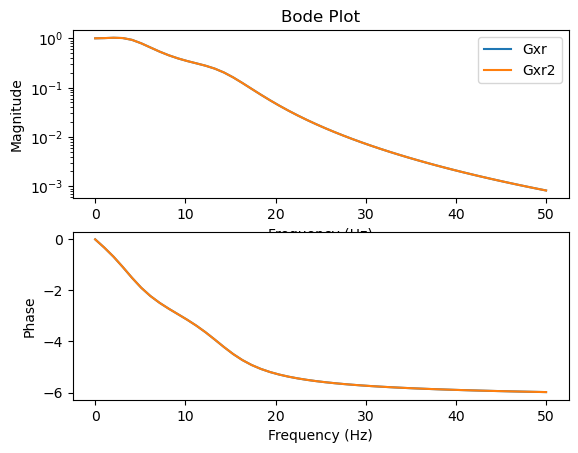

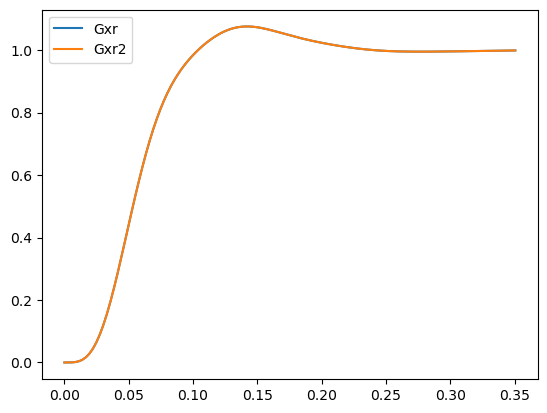

RiseTime: 0.05517816015418886
SettlingTime: 0.20691810057820825
SettlingMin: 0.904948968184515
SettlingMax: 1.0758588547853507
Overshoot: 7.5858854785350704
Undershoot: 0
Peak: 1.0758588547853507
PeakTime: 0.1407043083931816
SteadyStateValue: 1.0


In [46]:
#FT do anel fechado
#modelo com massa rigida mp acoplado a plataforma

import os
import matplotlib.pyplot as plt   # MATLAB plotting functions
import control as ct
from control.matlab import *  # MATLAB-like functions
#import math

kp=1.2993       #Pgain (kp=1.2993 V/cm)
tsv=0.0246      #Valve time constant (tsv=0.0246 s)
ksvkq=1934.5    #Valve flow gain (ksvkq=1934.5 cm3/s/V)
kpl=1.67401e-7  #Valve pressure gain & leakadge factor (kpl=1.67401e-7 m3/s/kPa)
Be=193716.28    #Oil Bulk modulus (Be=193716.28 kPa)
Vt=0.002659     #Oil Volume on actuator chamber (Vt=0.002659 m3)
A=0.012456      #Piston area (A=0.012456 m2)
mp=1.9751       #Platen mass (mp=1.9751 t)
ctm=5.78        #Total damping, actuator + platen (ct=5.78 kN s/m)
mt=5            #massa rigida


kh=4*Be*A**2/Vt                            #(kPa m)
Y0=A*kp*ksvkq/kpl*10**-4                   #(10^-4 t/s^2)
Y1=ctm+A**2/kpl                            #(kN s/m = t/s)
Y2=tsv*Y1+mt+ctm*A**2/(kpl*kh)             #(t)
Y3=mt*tsv+A**2/(kpl*kh)*(mt+tsv*ctm)       #(t s)
Y4=A**2/(kpl*kh)*mt*tsv                    #(t s^2)


#Closed-loop transfer function
s=tf('s')

#FT do anel aberto Gaa=xp/isv
#Gaa=A*kh*ksvkq/(s*(s*tsv + 1)*(A**2*ctm*s + A**2*kh + A**2*mt*s**2 + cl*ctm*kh + cl*kh*mt*s + ctm*kc*kh + kc*kh*mt*s))
Gaa=10**-4*A*kh*ksvkq/(s*(s*tsv + 1)*(A**2*ctm*s + A**2*kh + A**2*mt*s**2 + kpl*ctm*kh + kpl*kh*mt*s))
Gaa2 = ct.tf([10**-4*A*kh*ksvkq], [tsv*A**2*mt, tsv*A**2*ctm+A**2*mt+tsv*kpl*kh*mt, A**2*ctm+tsv*A**2*kh+tsv*kpl*kh*ctm+kpl*kh*mt, A**2*kh+kpl*kh*ctm, 0], inputs='isv', outputs='xp', name='Gaa')

#Gxr=A*kh*kp*kq*ksv/(A*kh*kp*kq*ksv + s*(s*tsv + 1)*(A**2*ct*s + A**2*kh + A**2*mt*s**2 + cl*ct*kh + cl*kh*mt*s + ct*kc*kh + kc*kh*mt*s))
#expressão anterior corrigida
#kq*ksv -> ksvkq
#ct -> ctm
#kpl=kc+cl
#fator 10^-4 da conversão de unidades
#Gxr=A*kh*kp*ksvkq*10**-4/(A*kh*kp*ksvkq*10**-4 + s*(s*tsv + 1)*(A**2*ctm*s + A**2*kh + A**2*mt*s*s + ctm*kh*kpl + kpl*kh*mt*s ))
Gxr=10**-4*A*kh*kp*ksvkq/(10**-4*A*kh*kp*ksvkq + s*(s*tsv + 1)*(A**2*ctm*s + A**2*kh + A**2*mt*s**2 + kpl*ctm*kh + kpl*kh*mt*s))
Gxr2 = ct.tf([Y0], [Y4, Y3, Y2, Y1, Y0], inputs='xref', outputs='xp', name='Gxpxref')

#FT do anel fechado
Gxraf=Gaa*kp/(1+Gaa*kp)
Gxraf2=minreal(Gxraf)     #reducao do modelo


# Bode plot for the system
plt.figure(1)
plt.subplot(2, 1, 1)
mag, phase, om = bode(Gxr, linspace(0.01, 50*6.28), dB=False, plot=False)
mag2, phase2, om2 = bode(Gxraf, linspace(0.01, 50*6.28), dB=False, plot=False)
#mag, phase, om = bode(Gxr, logspace(-2, 2), plot=True)
#mag, phase, om = bode(Gxr, Hz=True, dB=False, plot=True)
plt.semilogy(om/6.28, mag, om2/6.28, mag2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude") 
plt.title("Bode Plot")
plt.gca().legend(('Gxr','Gxr2'))
plt.subplot(2, 1, 2)
plt.plot(om/6.28, phase,om2/6.28, phase2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase")

# Step response for the system
plt.figure(2)
yout, T = step(Gxr)
yout2, T2 = step(Gxraf)
plt.plot(T.T, yout.T,T2.T, yout2.T)
plt.gca().legend(('Gxr','Gxr2'))
plt.show(block=False)

S_Gxr = ct.step_info(Gxr)
for k in S_Gxr:
    print(f"{k}: {S_Gxr[k]}")


#import numpy as np
#Gxr2.den/Gxr2.den[0][0][4]
#Gxr.den/Gxr.den[0][0][4]

In [11]:
# Analise Anel Aberto
#Polos
ct.damp(Gaa)

    Eigenvalue (pole)       Damping     Frequency
    -24.97    +92.06j        0.2618         95.39
    -24.97    -92.06j        0.2618         95.39
               -40.65             1         40.65
                    0             1             0


C:\Users\PC\anaconda3\Lib\site-packages\control\lti.py:57: RuntimeWarning: invalid value encountered in divide
  zeta = -real(splane_poles)/wn


(array([95.38882082, 95.38882082, 40.6504065 ,  0.        ]),
 array([0.2617639, 0.2617639, 1.       ,       nan]),
 array([-24.96934937+92.06279774j, -24.96934937-92.06279774j,
        -40.6504065  +0.j        ,   0.         +0.j        ]))

In [13]:
#Polo1: polo da dinamica acoplamento plataforma-atuador
#s=0

#Polo2: da dinâmica da servoválvula
#s=-1/tsv
-1/tsv

-40.65040650406504

In [48]:
#Polo 3 e 4: polos da dinamica acoplamento plataforma-atuador
#solucao da equacao A**2*ctm*s + A**2*kh + A**2*mt*s**2 + kpl*ctm*kh + kpl*kh*mt*s=0
{(-0.5*A**2*ctm - 8.37005e-8*kh*mt - 1.0*sqrt(0.25*A**4*ctm**2 - 1.0*A**4*kh*mt - 8.37005e-8*A**2*ctm*kh*mt + 7.00577370025001e-15*kh**2*mt**2))/(A**2*mt), 
 (-0.5*A**2*ctm - 8.37005e-8*kh*mt + 1.0*sqrt(0.25*A**4*ctm**2 - 1.0*A**4*kh*mt - 8.37005e-8*A**2*ctm*kh*mt + 7.00577370025001e-15*kh**2*mt**2))/(A**2*mt)}

{-24.9693493706506 + 92.062797744175*I, -24.9693493706506 - 92.062797744175*I}

In [50]:
#evolução dos polos 3 e 4 com a massa
mt2=2*mt
{(-0.5*A**2*ctm - 8.37005e-8*kh*mt2 - 1.0*sqrt(0.25*A**4*ctm**2 - 1.0*A**4*kh*mt2 - 8.37005e-8*A**2*ctm*kh*mt2 + 7.00577370025001e-15*kh**2*mt2**2))/(A**2*mt2), 
 (-0.5*A**2*ctm - 8.37005e-8*kh*mt2 + 1.0*sqrt(0.25*A**4*ctm**2 - 1.0*A**4*kh*mt2 - 8.37005e-8*A**2*ctm*kh*mt2 + 7.00577370025001e-15*kh**2*mt2**2))/(A**2*mt2)}


{-24.6803493706506 + 62.7725570865316*I,
 -24.6803493706506 - 62.7725570865316*I}

array([[list([<matplotlib.lines.Line2D object at 0x0000022A6E1F2F50>]),
        list([])],
       [list([<matplotlib.lines.Line2D object at 0x0000022A6E26D8D0>]),
        list([])]], dtype=object)

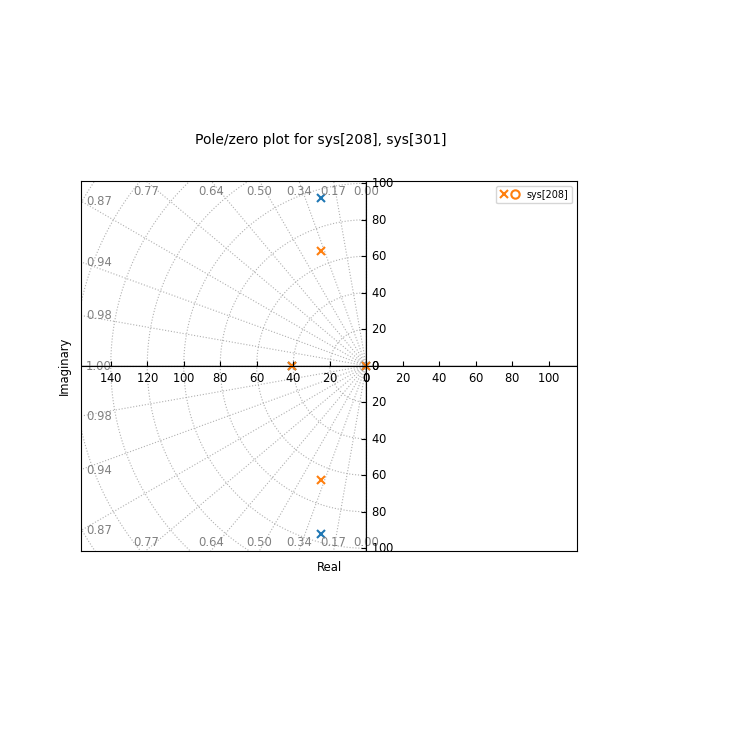

In [54]:
#evolução dos polos 3 e 4 com a massa
#Lugar das raizes
Gaa_2m=10**-4*A*kh*ksvkq/(s*(s*tsv + 1)*(A**2*ctm*s + A**2*kh + A**2*mt2*s**2 + kpl*ctm*kh + kpl*kh*mt2*s))

ct.pzmap([Gaa, Gaa_2m], grid='true')

In [79]:
#FT do anel aberto com saida em força Gfa=fp/isv
Gfa=minreal(Gaa*(mt*s**2 + ctm*s))

1 states have been removed from the model


array([[list([<matplotlib.lines.Line2D object at 0x0000022A6D0E6950>]),
        list([<matplotlib.lines.Line2D object at 0x0000022A70470610>])]],
      dtype=object)

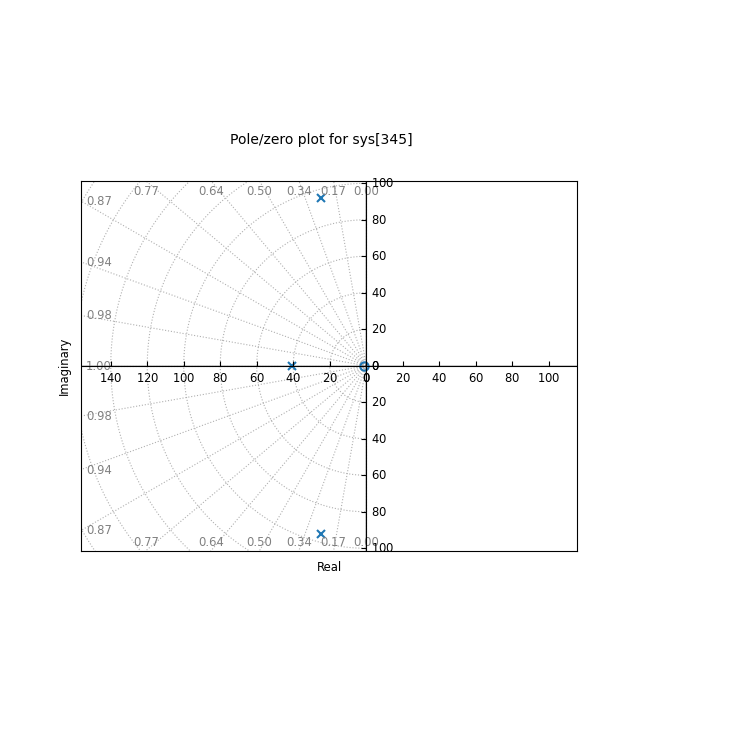

In [81]:
ct.pzmap(Gfa, grid='true')

In [83]:
#zeros Gfa
zeros(Gfa)

array([-1.156+0.j])

In [77]:
minreal(Gfa)

1 states have been removed from the model


TransferFunction(array([28544339.6926466 , 32997256.68469948]), array([1.00000000e+00, 9.05891052e+01, 1.11290555e+04, 3.69879152e+05]))

In [10]:
Gaa2

TransferFunction(array([108.9462553]), array([1.90836881e-05, 1.72877423e-03, 2.12383425e-01, 7.05865838e+00,
       0.00000000e+00]))

In [3]:
ct.damp(Gaa2)

    Eigenvalue (pole)       Damping     Frequency
    -24.97    +92.06j        0.2618         95.39
    -24.97    -92.06j        0.2618         95.39
               -40.65             1         40.65
                    0             1             0


C:\Users\PC\anaconda3\Lib\site-packages\control\lti.py:57: RuntimeWarning: invalid value encountered in divide
  zeta = -real(splane_poles)/wn


(array([95.38882082, 95.38882082, 40.6504065 ,  0.        ]),
 array([0.2617639, 0.2617639, 1.       ,       nan]),
 array([-24.96934937+92.06279774j, -24.96934937-92.06279774j,
        -40.6504065  +0.j        ,   0.         +0.j        ]))

In [9]:
95/6.28


15.127388535031846

array([[list([<matplotlib.lines.Line2D object at 0x000001903238CB90>]),
        list([])]], dtype=object)

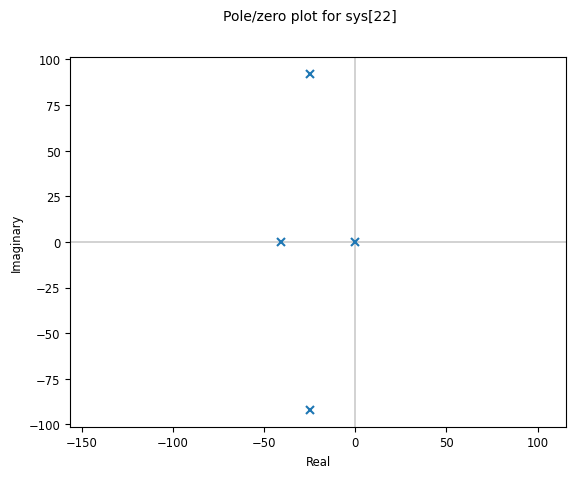

In [3]:
ct.pzmap(Gaa)

In [14]:
import math
math.pi

3.141592653589793

In [5]:
A**2*kh + kpl*ctm*kh

7.058658379705859

In [139]:
Gaa

TransferFunction(array([108.9462553]), array([1.90836881e-05, 1.72877423e-03, 2.12383425e-01, 7.05865838e+00,
       0.00000000e+00]))

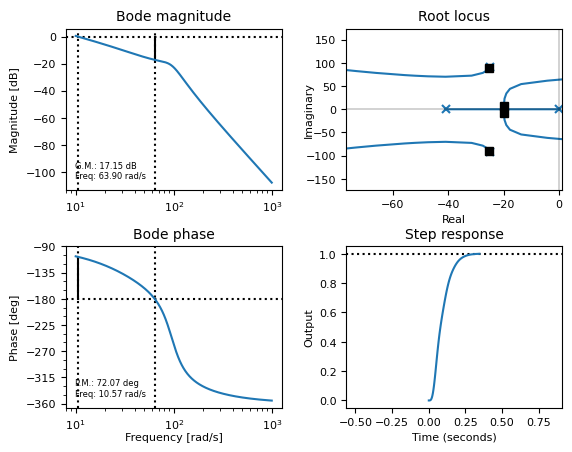

In [209]:
ct.sisotool(Gaa, initial_gain=0.7)

StateSpace(array([[  -90.58910525,   111.29055541,    36.98791519,   -68.50641526,
            0.        ,     0.        ],
       [ -100.        ,     0.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,   100.        ,     0.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,   -10.        ,     0.        ,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        ,    57.08867939,
            0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , -5708.86793853,
            0.        ,  -100.        ]]), array([[-1.2],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 1. ],
       [ 0. ]]), array([[  0.        ,   0.        ,   0.        , -57.08867939,
          0.        ,   0.        ]]), array([[0.]]))

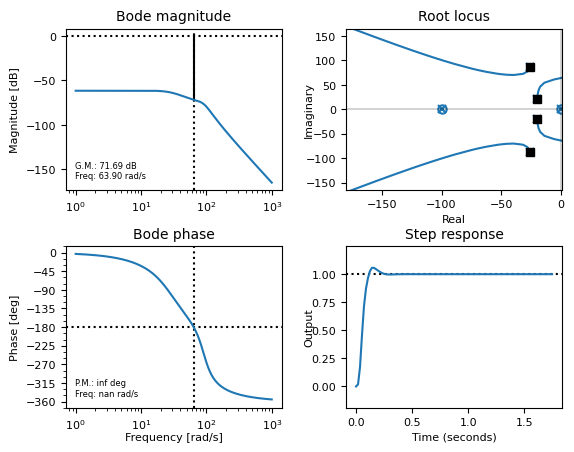

In [215]:
ct.rootlocus_pid_designer(Gaa,gain='P', sign=1, input_signal='r', Kp0=1.2, Ki0=0, Kd0=0,)

array([[list([<matplotlib.lines.Line2D object at 0x0000022A05E35490>]),
        list([]),
        list([<matplotlib.lines.Line2D object at 0x0000022A05EAD410>, <matplotlib.lines.Line2D object at 0x0000022A05EADB50>, <matplotlib.lines.Line2D object at 0x0000022A05EAE490>, <matplotlib.lines.Line2D object at 0x0000022A05EAED10>])]],
      dtype=object)

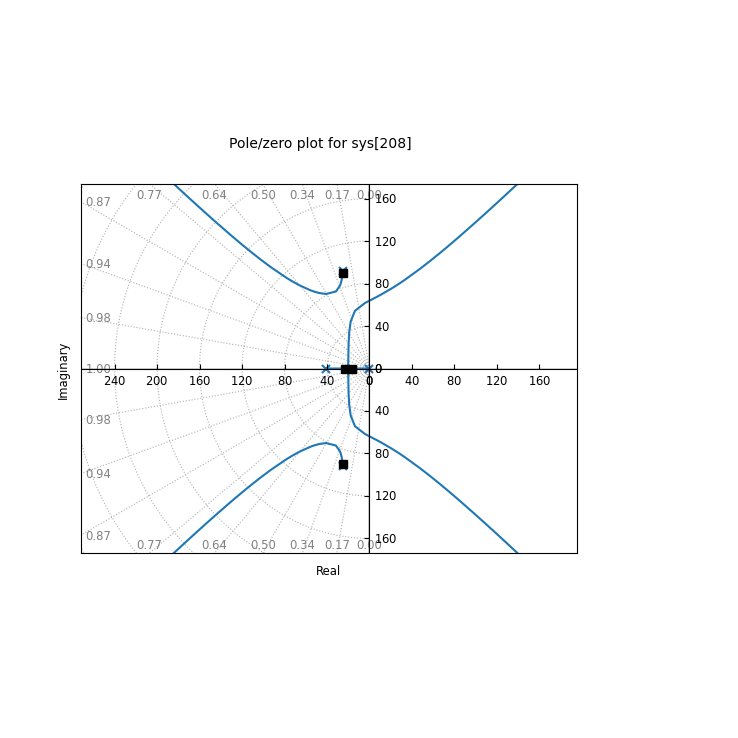

In [205]:
ct.root_locus(Gaa,grid='true', initial_gain=0.6)

In [137]:
Gfa

TransferFunction(array([28544339.6926466 , 32997256.68469948]), array([1.00000000e+00, 9.05891052e+01, 1.11290555e+04, 3.69879152e+05]))

array([[list([<matplotlib.lines.Line2D object at 0x0000022A704BB810>]),
        list([<matplotlib.lines.Line2D object at 0x0000022A70A4F5D0>]),
        list([<matplotlib.lines.Line2D object at 0x0000022A70A4FD50>, <matplotlib.lines.Line2D object at 0x0000022A70A40650>, <matplotlib.lines.Line2D object at 0x0000022A70A40ED0>])]],
      dtype=object)

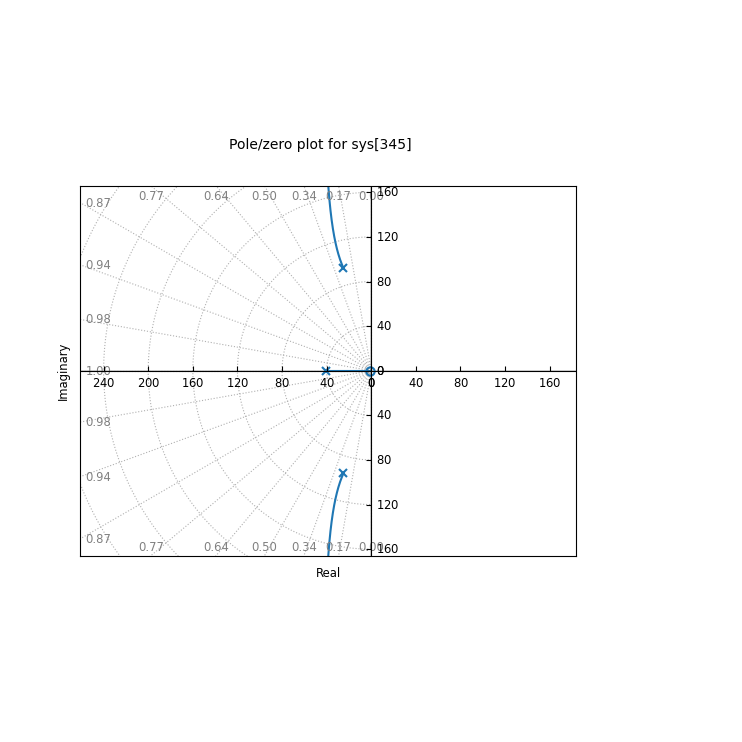

In [85]:
ct.root_locus(Gfa)#,ylim=[-5,5])

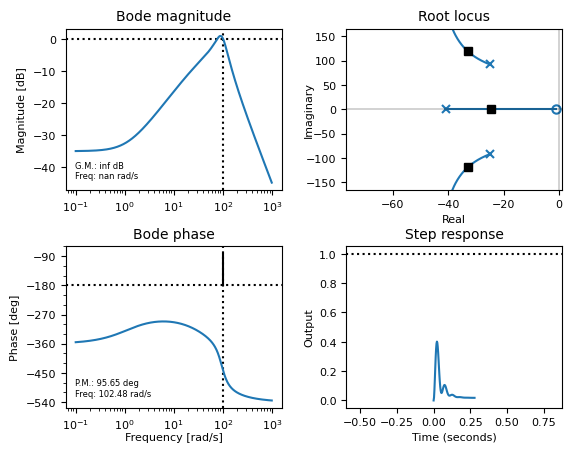

In [196]:
ct.sisotool(Gfa, initial_gain=2*10**-4)

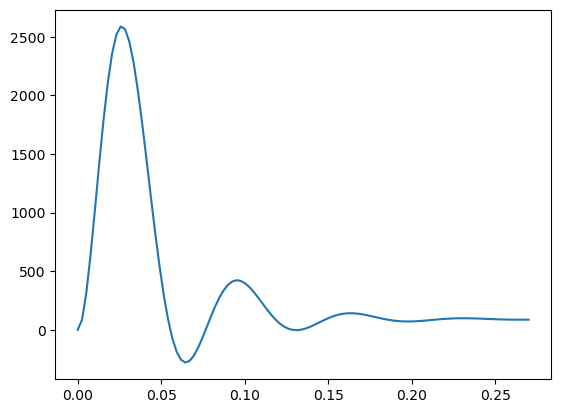

In [162]:
#Anel Fechado com ganho
gfa_gain=10**-5
Gfa_af=Gfa/(1+gfa_gain*Gfa)
Gfa2_af=gfa_gain*Gfa/(1+gfa_gain*Gfa)

# Step response for the system
plt.figure(2)
yout, T = step(Gfa_af)
yout2, T2 = step(Gfa2_af)
#plt.plot(T.T, yout.T,T2.T, yout2.T)
#plt.gca().legend(('FT1','FT2'))
plt.plot(T, yout)
#plt.plot(T2.T, yout2.T)
plt.show(block=False)


In [117]:


step(Gfa_af)

(array([ 0.        , 12.11387194, 17.96967013, ...,  8.9930186 ,
         8.99301726,  8.99301592]),
 array([0.00000000e+00, 1.07901415e-03, 2.15802830e-03, ...,
        5.39183370e+00, 5.39291272e+00, 5.39399173e+00]))

array([[list([<matplotlib.lines.Line2D object at 0x0000022A77195410>]),
        list([])]], dtype=object)

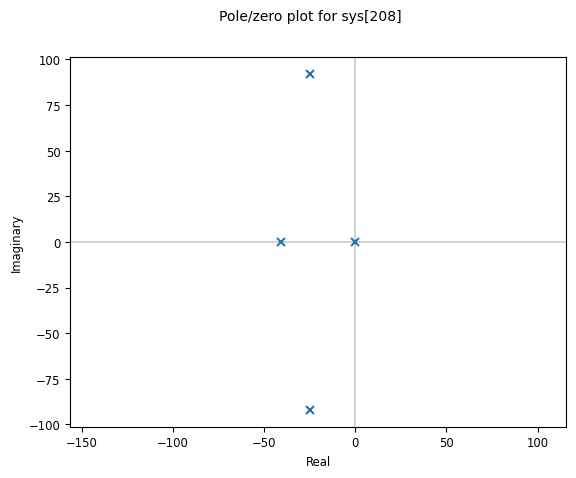

In [113]:
ct.pzmap(Gaa)

In [74]:
Gaa4

FrequencyResponseData(array([[[-0.46439612-1.54344129e+03j, -0.4549702 -2.34096246e+00j,
         -0.42936491-1.08379528e+00j, -0.39381808-6.40125265e-01j,
         -0.35500531-4.10279204e-01j, -0.31782019-2.71745914e-01j,
         -0.28488778-1.81085727e-01j, -0.25706542-1.17865931e-01j,
         -0.23408699-7.07484084e-02j, -0.21494906-3.27056259e-02j,
         -0.19793821+9.73571825e-04j, -0.1803274 +3.33656082e-02j,
         -0.15805305+6.53863904e-02j, -0.12665048+9.39821224e-02j,
         -0.08555624+1.11289754e-01j, -0.04290139+1.10435813e-01j,
         -0.01022768+9.44628388e-02j,  0.0083825 +7.33350376e-02j,
          0.01632956+5.43233164e-02j,  0.01835659+3.96876683e-02j,
          0.01767139+2.91000841e-02j,  0.01595796+2.15824062e-02j,
          0.01399634+1.62370270e-02j,  0.01211468+1.23971709e-02j,
          0.01043184+9.60073721e-03j,  0.00897459+7.53412255e-03j,
          0.00773184+5.98465435e-03j,  0.00667907+4.80690323e-03j,
          0.00578906+3.90019438e-03j,  0

In [75]:
Gfrd

FrequencyResponseData(array([[[ 9.99999901e-01-4.98655289e-04j,
          9.56590313e-01-3.22937793e-01j,
          7.97043940e-01-6.46416585e-01j,
          4.75045038e-01-8.94126382e-01j,
          6.20994506e-02-9.28036848e-01j,
         -2.50918544e-01-7.52353234e-01j,
         -3.93265812e-01-5.20467651e-01j,
         -4.26107035e-01-3.27928342e-01j,
         -4.12441228e-01-1.86586570e-01j,
         -3.82700890e-01-8.15258937e-02j,
         -3.46219284e-01+2.29250509e-03j,
         -3.01820460e-01+7.37056168e-02j,
         -2.44207399e-01+1.33020399e-01j,
         -1.71932925e-01+1.71293389e-01j,
         -9.60578987e-02+1.78310166e-01j,
         -3.51293777e-02+1.57298010e-01j,
          1.97416287e-03+1.24142981e-01j,
          1.94854171e-02+9.24209698e-02j,
          2.54317086e-02+6.73581195e-02j,
          2.57663773e-02+4.90672252e-02j,
          2.37787285e-02+3.60822084e-02j,
          2.10518483e-02+2.68940579e-02j,
          1.82821042e-02+2.03411629e-02j,
          1.